<a href="https://colab.research.google.com/github/riddhigarg2605/cureya_tasks/blob/main/Task_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression for insurance charge prediction**

# Importing the libraries and dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import io
insurance = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# Visualising charges vs age

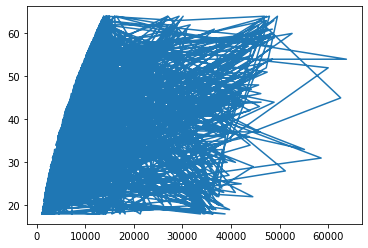

In [6]:
plt.plot(insurance.charges, insurance.age)
plt.show()

In [7]:
import seaborn as sns

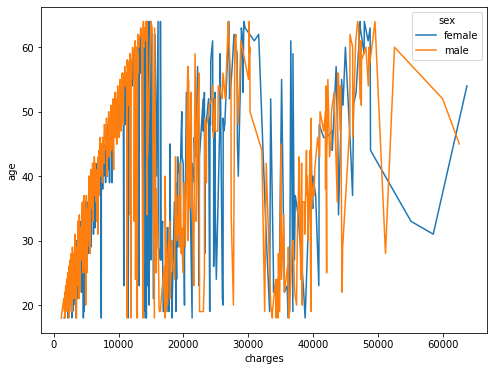

In [8]:
plt.figure(figsize = (8,6))
sns.lineplot(x = insurance.charges, y = insurance.age, hue= insurance.sex)

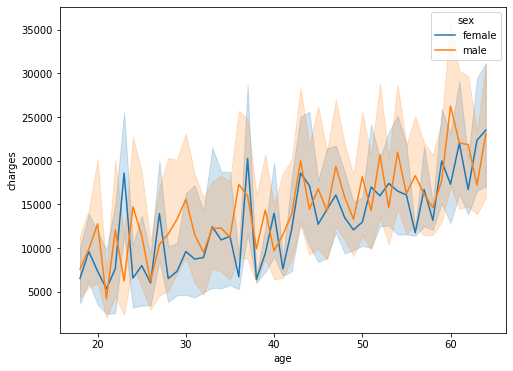

In [9]:
plt.figure(figsize = (8,6))
sns.lineplot(x = insurance.age, y = insurance.charges, hue= insurance.sex)

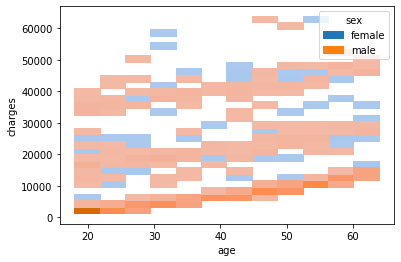

In [10]:
sns.histplot(x = insurance.age, y = insurance.charges, hue= insurance.sex)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


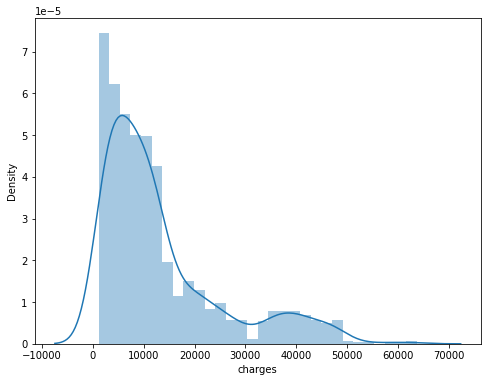

In [15]:
plt.figure(figsize=(8,6))
plt.tight_layout()
sns.distplot(insurance['charges'])

# One hot encoding the nominal variables

In [16]:
gender = pd.get_dummies(insurance.sex)
gender.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
ins = pd.concat([insurance, gender], axis = 1)
ins = ins.drop(['sex','male'], axis = 1)

In [18]:
ins.head() #1 is female and 0 is male

,age,bmi,children,smoker,region,charges,female
0,19,27.900,0,yes,southwest,16884.92400,1
1,18,33.770,1,no,southeast,1725.55230,0
2,28,33.000,3,no,southeast,4449.46200,0
3,33,22.705,0,no,northwest,21984.47061,0
4,32,28.880,0,no,northwest,3866.85520,0


In [19]:
smoke = pd.get_dummies(ins.smoker)
ins = pd.concat([ins, smoke], axis = 1)
ins = ins.drop(['smoker','no'], axis = 1)

In [20]:
ins = ins.rename({'yes':'smoker', 'female':'gender'} ,axis = 1) #1 means the person smokes

In [21]:
reg = pd.get_dummies(ins.region)
ins = pd.concat([ins, reg], axis = 1)
ins = ins.drop(['region'], axis = 1)

In [22]:
ins.head()

,age,bmi,children,charges,gender,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [89]:
X_train,X_test,y_train,y_test=train_test_split(ins.drop(labels=['charges'], axis=1),
    ins['charges'],
    test_size=0.3)

# Using regression models

**Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
r_sq = lr.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7505185804211459


In [29]:
print('intercept:', lr.intercept_)

intercept: -13007.197490462519


In [30]:
print('slope:', lr.coef_)

slope: [  251.20395792   355.80937936   615.32584569    71.28559891
 23978.41715735   673.62405838   476.65569952  -722.12410772
  -428.15565018]


In [40]:
lr_pred = lr.predict(X_test)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 4186.2366172655475
Mean Squared Error: 35083850.86429668
Root Mean Squared Error: 5923.162235182883


In [90]:
y_test = y_test.to_numpy()

In [44]:
predvsactual = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lr_pred.flatten()})
predvsactual

,Actual,Predicted
0,6113.23105,8221.419423
1,1631.82120,4484.018285
2,5377.45780,9161.599750
3,9500.57305,9890.079731
4,14007.22200,14724.424590
...,...,...
397,1909.52745,3865.563477
398,2755.02095,7427.191587
399,10796.35025,11792.221021
400,1731.67700,-1261.519126


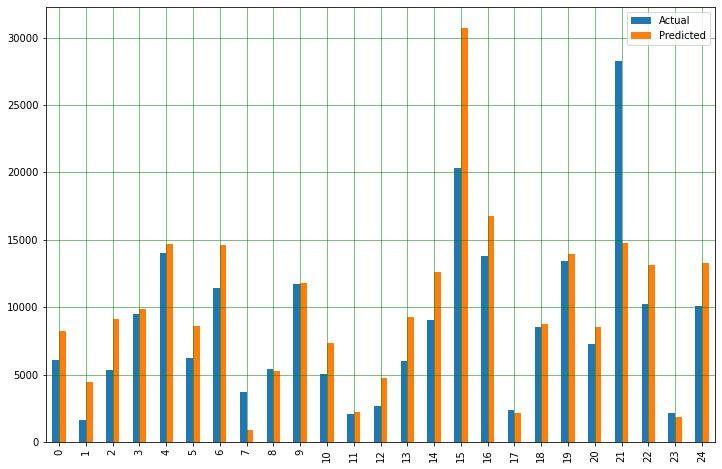

In [46]:
df1 = predvsactual.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Lasso Regression**

In [91]:
from sklearn.linear_model import Lasso

In [92]:
lasso_reg = Lasso(normalize=True)

In [94]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [99]:
lass_pred =lasso_reg.predict(X_test)

In [96]:
lasso_sq = lasso_reg.score(X_train, y_train)
print('coefficient of determination:', lasso_sq)

coefficient of determination: 0.7420381738386492


In [98]:
print('intercept:', lasso_reg.intercept_)

intercept: -11767.690384120337


In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lass_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lass_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lass_pred)))

Mean Absolute Error: 3954.6727040832807
Mean Squared Error: 32351587.938756943
Root Mean Squared Error: 5687.845632465507


In [101]:
predvsactual = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lass_pred.flatten()})
predvsactual

,Actual,Predicted
0,47496.49445,39571.577914
1,13880.94900,13573.485015
2,34779.61500,27823.549009
3,9563.02900,12070.070498
4,27322.73386,12468.712121
...,...,...
397,41949.24410,34669.966620
398,48824.45000,39358.779712
399,11353.22760,12878.450141
400,2927.06470,9612.464931


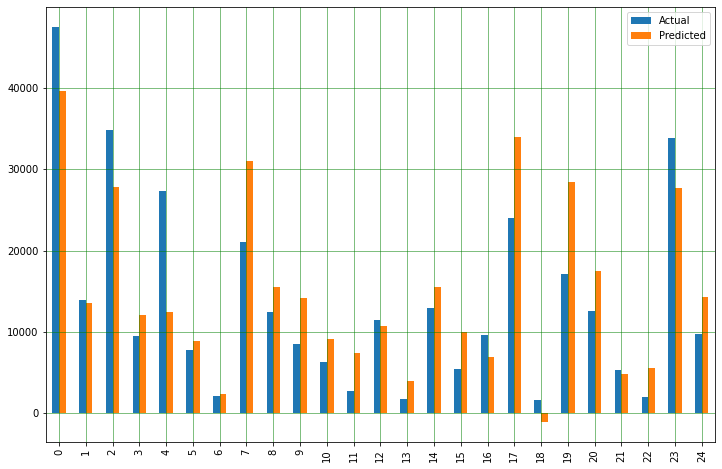

In [102]:
df1 = predvsactual.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Ridge Regression**

In [104]:
from sklearn.linear_model import Ridge

In [105]:
r_reg = Ridge(normalize=True)

In [106]:
r_reg.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [108]:
r_pred =r_reg.predict(X_test)

In [109]:
r_sq = r_reg.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5556495269912729


In [110]:
print('intercept:', r_reg.intercept_)

intercept: 1182.815362778325


In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, r_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, r_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, r_pred)))

Mean Absolute Error: 5713.187495704913
Mean Squared Error: 59717523.0878591
Root Mean Squared Error: 7727.711374518273


In [112]:
predvsactual = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': r_pred.flatten()})
predvsactual

,Actual,Predicted
0,47496.49445,26396.722912
1,13880.94900,13013.387761
2,34779.61500,20233.781895
3,9563.02900,12572.252888
4,27322.73386,13257.220833
...,...,...
397,41949.24410,24505.150938
398,48824.45000,25818.689492
399,11353.22760,13075.136083
400,2927.06470,11888.637426


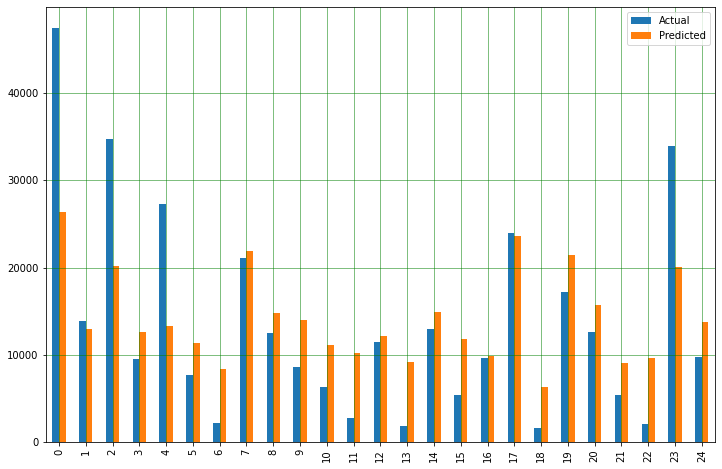

In [113]:
df1 = predvsactual.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**SVM** 

In [70]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#y_train = sc_y.fit_transform(y_train)

In [73]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
r_sq = svr.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: -0.09720026368228196


In [75]:
print('intercept:', svr.intercept_)

intercept: [9216.21260273]


In [76]:
svr_pred = svr.predict(X_test)

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

Mean Absolute Error: 9011.161088320481
Mean Squared Error: 176431004.65949252
Root Mean Squared Error: 13282.73332787693


In [80]:
svrgraph = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': svr_pred.flatten()})
svrgraph

,Actual,Predicted
0,2102.26470,9116.862377
1,4350.51440,9153.794257
2,7986.47525,9192.270675
3,9722.76950,9265.829133
4,30184.93670,9295.713800
...,...,...
397,13974.45555,9310.381678
398,4340.44090,9140.276118
399,11289.10925,9265.530483
400,8534.67180,9235.692849


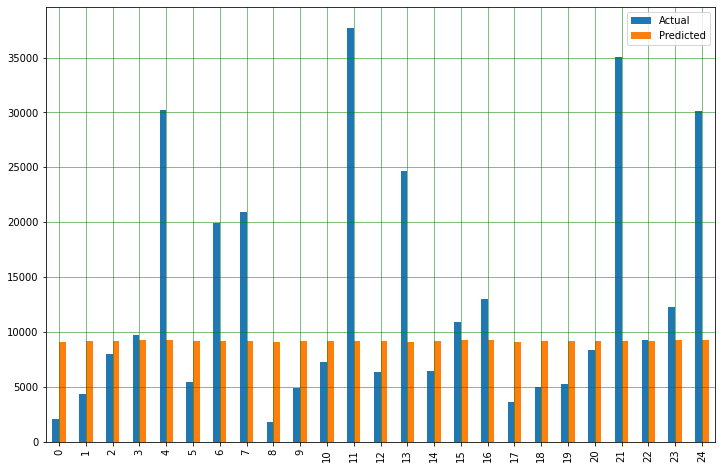

In [81]:
df1 = svrgraph.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()